In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [23]:
#display the correlation matrix
train_data.corr()

#observations
# age can be dropped
# room service dropped
# food court, shopping mall, spa, vr deck dropped
# all numerical features needs to be dropped

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [24]:
train_data.count()

PassengerId     8693
HomePlanet      8492
CryoSleep       8476
Cabin           8494
Destination     8511
Age             8514
VIP             8490
RoomService     8512
FoodCourt       8510
ShoppingMall    8485
Spa             8510
VRDeck          8505
Name            8493
Transported     8693
dtype: int64

In [33]:
#Transported: convert boolean to numeric
train_data['Transported'].replace([True,False],[1,0],inplace=True)
print(train_data['Transported'].head())

train_data['CryoSleep'].replace([True,False],[int(1),int(0)],inplace=True)
print(train_data['CryoSleep'].head())

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CryoSleep, dtype: float64


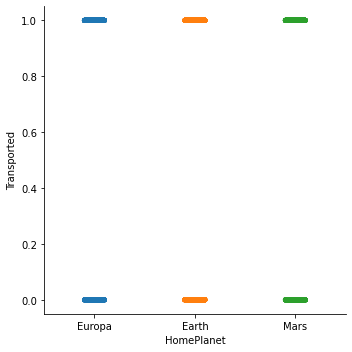

In [27]:
#use seaborn to plot relation btwn HomePlanet and Transported
sns.catplot(data=train_data,x='HomePlanet',y='Transported')

In [28]:
print("missing values:",train_data['PassengerId'].count() - train_data['HomePlanet'].count())

#find HomePlanet earth and Transported = true, total earth
print("HomePlanet: Earth and Transported: True > ",len(train_data[(train_data.HomePlanet=='Earth') & (train_data.Transported==True)]))
print("HomePlanet: Earth > ",len(train_data[(train_data.HomePlanet=='Earth')]))

print("HomePlanet: Mars and Transported: True > ",len(train_data[(train_data.HomePlanet=='Mars') & (train_data.Transported==True)]))
print("HomePlanet: Mars > ",len(train_data[(train_data.HomePlanet=='Mars')]))

print("HomePlanet: Europa and Transported: True > ",len(train_data[(train_data.HomePlanet=='Europa') & (train_data.Transported==True)]))
print("HomePlanet: Europa > ",len(train_data[(train_data.HomePlanet=='Europa')]))

#HomePlanet can be dropped

missing values: 201
HomePlanet: Earth and Transported: True >  1951
HomePlanet: Earth >  4602
HomePlanet: Mars and Transported: True >  920
HomePlanet: Mars >  1759
HomePlanet: Europa and Transported: True >  1404
HomePlanet: Europa >  2131


In [34]:
# CryoSleep vs Transported
homeplanet_v = set(train_data['CryoSleep'])
print("CryoSleep")
print("Values count:",len(homeplanet_v))
print("Values:",set(homeplanet_v))
print("missing values:",train_data['PassengerId'].count() - train_data['CryoSleep'].count())

CryoSleep
Values count: 219
Values: {0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

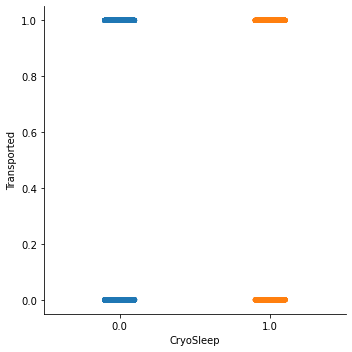

In [35]:
#use seaborn to plot relation btwn CryoSleep and Transported
sns.catplot(data=train_data,x='CryoSleep',y='Transported')

In [36]:
#find CryoSleep and Transported = true,
count_cry_trans_tt = len(train_data[(train_data.CryoSleep==1) & (train_data.Transported==True)])
count_cry_trans_tf = len(train_data[(train_data.CryoSleep==1) & (train_data.Transported==False)])
count_cry_t = len(train_data[(train_data.CryoSleep==1)])

count_cry_trans_ft = len(train_data[(train_data.CryoSleep==0) & (train_data.Transported==True)])
count_cry_trans_ff = len(train_data[(train_data.CryoSleep==0) & (train_data.Transported==False)])
count_cry_f = len(train_data[(train_data.CryoSleep==0)])

print("CryoSleep:True & Transported: True > ",count_cry_trans_tt)
print("CryoSleep:True & Transported: False > ",count_cry_trans_tf)
print("CryoSleep:True > ",count_cry_t)


print("CryoSleep:False and Transported: True > ",count_cry_trans_ft)
print("CryoSleep:False and Transported: False > ",count_cry_trans_ff)

print("CryoSleep:False > ",count_cry_f)

#observations:
print("probability of Transported if cryosleep is true:",count_cry_trans_tt/count_cry_t)   #P(T=1|C=1) = P(T=1 & C=1)/P(c=1)
print("probability of Transported if cryosleep is false:",count_cry_trans_ft/count_cry_f)   #P(T=1|C=0) = P(T=1 & C=0)/P(c=0)

# CryoSleep should be considered

CryoSleep:True & Transported: True >  2483
CryoSleep:True & Transported: False >  554
CryoSleep:True >  3037
CryoSleep:False and Transported: True >  1789
CryoSleep:False and Transported: False >  3650
CryoSleep:False >  5439
probability of Transported if cryosleep is true: 0.8175831412578202
probability of Transported if cryosleep is false: 0.3289207574921861


In [46]:
#treat missing values

#fill missing values with mode
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode)
print(train_data['CryoSleep'].count(), train_data['PassengerId'].count())
print(train_data['CryoSleep'].head())

8693 8693
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CryoSleep, dtype: object


In [52]:
#Cabin vs Transported
count_cabin = train_data['Cabin'].count()
missing_cabin = train_data['PassengerId'].count() - count_cabin
print("Cabin count:",count_cabin)
print("Missing values:",missing_cabin)
print("Unique Values count Cabin:",len(set(train_data['Cabin'])))

#observation
# drop column Cabin as it has 6500+ different unique values

Cabin count: 8494
Missing values: 199
Unique Values count Cabin: 6561
